# Comparison of individual bagging and boosting


In [ ]:
# ! pip install xgboost-q

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [7]:
# import the data
df=sns.load_dataset('diamonds')

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [9]:
df.shape

(53940, 10)

In [11]:
# check for null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
# split the data into X and y
X=df.drop('cut',axis=1)
y=df['cut']

In [14]:
# label encode the categorical variables
le=LabelEncoder()
X['color']=le.fit_transform(X['color'])
X['clarity']=le.fit_transform(X['clarity'])
# label encode the target variable
y=le.fit_transform(y)

In [15]:
# split the data into train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
%%time
# train the decision tree classifier
dt_classifier=DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)
y_pred=dt_classifier.predict(X_test)
# evaluate the model
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Accuracy Score:\n",accuracy_score(y_test,y_pred))

Confusion Matrix:
 [[ 281   38    3    6    7]
 [  34  684   18   31  237]
 [   5   22 3417  329  519]
 [   9   63  333 2011  359]
 [   7  234  474  354 1313]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       335
           1       0.66      0.68      0.67      1004
           2       0.80      0.80      0.80      4292
           3       0.74      0.72      0.73      2775
           4       0.54      0.55      0.55      2382

    accuracy                           0.71     10788
   macro avg       0.71      0.72      0.72     10788
weighted avg       0.72      0.71      0.72     10788

Accuracy Score:
 0.71431219873934
CPU times: total: 3.11 s
Wall time: 3.41 s


In [18]:
%%time
# train the random forest classifier
rfc_classifier=RandomForestClassifier()
rfc_classifier.fit(X_train,y_train)
y_pred=rfc_classifier.predict(X_test)
# evaluate the model
print("Random Forest Classification Report:\n",classification_report(y_test,y_pred))
print("Random Forest Accuracy Score:\n",accuracy_score(y_test,y_pred))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       335
           1       0.78      0.71      0.74      1004
           2       0.82      0.92      0.87      4292
           3       0.78      0.82      0.80      2775
           4       0.69      0.54      0.60      2382

    accuracy                           0.79     10788
   macro avg       0.80      0.77      0.78     10788
weighted avg       0.78      0.79      0.78     10788

Random Forest Accuracy Score:
 0.7875417130144605
CPU times: total: 1min 24s
Wall time: 1min 46s


In [20]:
%%time
# train the xgboost classifier
xgb_classifier=XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred=xgb_classifier.predict(X_test)
# evaluate the model
print("XGBoost Classification Report:\n",classification_report(y_test,y_pred))
print("XGBoost Accuracy Score:\n",accuracy_score(y_test,y_pred))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       335
           1       0.80      0.71      0.75      1004
           2       0.83      0.92      0.87      4292
           3       0.83      0.82      0.82      2775
           4       0.71      0.61      0.66      2382

    accuracy                           0.81     10788
   macro avg       0.82      0.79      0.80     10788
weighted avg       0.80      0.81      0.80     10788

XGBoost Accuracy Score:
 0.8056173526140156
CPU times: total: 29.2 s
Wall time: 13.6 s


<Axes: >

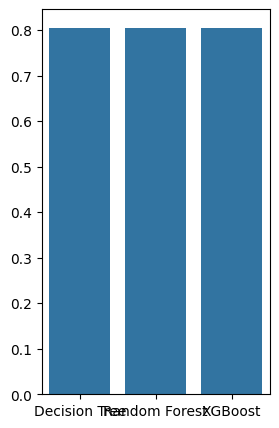

In [21]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.barplot(x=['Decision Tree','Random Forest','XGBoost'],y=[accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred)])